In [2]:
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
#import math
from IPython.display import Image
from qutip import *
import sympy as sy
from sympy import I
from math import *

In [41]:
#System Parameters (in units of wm)
#-----------------------------------
Nc = 2                     # Number of cavity states
Nm = 3                     # Number of mech states
kappa = 0.05               # Cavity damping rate
E = 0.005              # Driving Amplitude         
g0 = 0.8               # Coupling strength
Qm = 1e4                   # Mech quality factor
gamma = kappa/3          # Mech damping rate
d = tensor(destroy(Nc), qeye(Nm))
c = tensor(qeye(Nc), destroy(Nm))
num_c = c.dag()*c
num_d = d.dag()*d

In [4]:
# Operators
#----------
d = tensor(destroy(Nc), qeye(Nm))
c = tensor(qeye(Nc), destroy(Nm))
sd = d*np.sqrt(1 + N) + d.dag()*np.sqrt(N)*np.exp(1j*theta)
sc = c*np.sqrt((1 + Neff)) + c.dag()*np.sqrt(Neff)*np.exp(1j*theta)
num_c = c.dag()*c
num_d = d.dag()*d

# squeezed collapse operators SSME
#----------------------------
scc0 = np.sqrt(kappa)*sd
scm0 = np.sqrt(gamma)*sc
sc_ops0 = [scc0, scm0]

# Collapse operators SME
cc0 = np.sqrt(kappa)*d
#cc00 = np.sqrt(kappa*(1.0 + n_th))*d            #n_th(w) is nearly 0 at optical frequencies. Also spectral density value is low for ohmic reserviors.
cm0 = np.sqrt(gamma*(1.0 + n_th))*c
cp0 = np.sqrt(gamma*(n_th))*c.dag()
c_ops0 = [cc0,cm0,cp0]

# Collapse operators_dphasd-SME
#-------------------
cc = np.sqrt(kappa)*d
cm = np.sqrt(gamma*(1.0 + n_th))*(c - g0*(d.dag()*d))
cp = np.sqrt(gamma*n_th)*(c.dag() - g0*(d.dag()*d))
cncm = np.sqrt(gamma*((2*n_th) + 1.0))*(g0*d.dag()*d)
c_ops = [cc,cm,cp,cncm]

# Collapse operators_modSSME
#-------------------
scc = np.sqrt(kappa)*sd
scm = np.sqrt(gamma)*(sc - g0*(sd.dag()*sd))
scncm = np.sqrt(gamma)*g0**(2)*(sd.dag()*sd)
sc_ops = [scc,scm,scncm]

# Collapse operators_Squeezed_DSME
#-------------------
scc1 = np.sqrt(kappa)*sd
scm1 = np.sqrt(gamma)*(sc - g0*(sd.dag()*sd))
#scncm = np.sqrt(gamma)*g0**(2)*(sd.dag()*sd)
sc_ops1 = [scc1,scm1]


# Collapse operators_DSME
#-------------------
cc1 = np.sqrt(kappa)*d
cm1 = np.sqrt(gamma*(1.0 + n_th))*(c - g0*(d.dag()*d))
cp1 = np.sqrt(gamma*n_th)*(c.dag() - g0*(d.dag()*d))
cp11 = 2*np.sqrt(gamma*n_th)*(g0*d.dag()*d)
c_ops1 = [cc1,cm1,cp1,cp11]

#Squeezed collapse op SME
o0 = np.sqrt(kappa*(N + 1))*d
o1 = np.sqrt(kappa*N)*d.dag()
o2 = np.sqrt(kappa*M)*d
o3 = np.sqrt(kappa*np.conj(M))*d.dag()
op = [o0, o1]
op1 = [o2, o3]
SLo0 = sum([spre(a)*spost(a.dag()) - 0.5 * spre(a.dag()*a) - 0.5 * spost(a.dag()*a) for a in op])
SLo1 = sum([spre(a)*spost(a) - 0.5 * spre(a*a) - 0.5 * spost(a*a) for a in op1])
SLo = SLo0 + SLo1

#Squeezed collapse op SME
m0 = np.sqrt(gamma*(Neff + 1))*c
m1 = np.sqrt(gamma*Neff)*c.dag()
m2 = np.sqrt(gamma*Meff)*c
m3 = np.sqrt(gamma*np.conj(Meff))*c.dag()
mp = [m0, m1]
mp1 = [m2, m3]
SLm0 = sum([spre(a)*spost(a.dag()) - 0.5 * spre(a.dag()*a) - 0.5 * spost(a.dag()*a) for a in mp])
SLm1 = sum([spre(a)*spost(a) - 0.5 * spre(a*a) - 0.5 * spost(a*a) for a in mp1])
SLm = SLm0 + SLm1

#Squeezed collapse op DSME
Dm0 = np.sqrt(gamma*(Neff + 1))*(c - g0*(num_d))
Dm1 = np.sqrt(gamma*Neff)*(c.dag() - g0*(num_d))
Dm2 = np.sqrt(gamma*Meff)*(c - g0*(num_d))
Dm3 = np.sqrt(gamma*np.conj(Meff))*(c.dag() - g0*(num_d))
Dm4 = np.sqrt(4*gamma*n_th*(cosh(r)**2 + sinh(r)**2 + 2*cosh(r)*sinh(r)*cos(theta)))*(g0*d.dag()*d)
Dmp = [Dm0, Dm1]
Dmp1 = [Dm2, Dm3]
Dmp2 = [Dm4]
DSLm0 = sum([spre(a)*spost(a.dag()) - 0.5 * spre(a.dag()*a) - 0.5 * spost(a.dag()*a) for a in Dmp])
DSLm1 = sum([spre(a)*spost(a) - 0.5 * spre(a*a) - 0.5 * spost(a*a) for a in Dmp1])
DSLm2 = sum([spre(a)*spost(a) - 0.5 * spre(a*a) - 0.5 * spost(a*a) for a in Dmp2])
DSLm = DSLm0 + DSLm1 + DSLm2

#Squeezed collapse op DSME
dDm0 = np.sqrt(gamma*(2*Neff + 1))*(g0*num_d)
dDm1 = np.sqrt(2*gamma*cosh(r)*sinh(r))*(g0*num_d)
dDmp = [dDm0]
dDmp1 = [dDm1]
dDSLm0 = sum([spre(a)*spost(a.dag()) - 0.5 * spre(a.dag()*a) - 0.5 * spost(a.dag()*a) for a in dDmp])
dDSLm1 = sum([spre(a)*spost(a) - 0.5 * spre(a*a) - 0.5 * spost(a*a) for a in dDmp1])
dDSLm = DSLm + (dDSLm0 + dDSLm1) - DSLm2

NameError: name 'N' is not defined

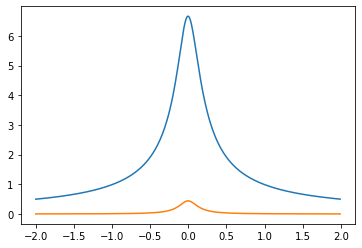

In [83]:
x, y = sy.symbols("x, y")

X, Y, a, b = [], [], [], []
alpha = []
alpha_s = []
Delta = []

for delta in range (-200,200,1):
    delta = round(delta*(0.01), 2)
    C = 1j*g0**2/((gamma/2)**2 + 1)*1/(1j*delta-(kappa/2))
    D = np.conj(C)
    A = 1j*E*1/(1j*delta-(kappa/2))
    B = np.conj(A)
    values = sy.nsolve((x + C*y*x**2 - A, y + D*x*y**2 - B), (x, y), (0, 0))
    alpha.append(values[0])
    alpha_s.append(values[1]) 
    Delta.append(delta)

for i in range(len(alpha)):
    X.append(round(LA.norm(complex(alpha[i])), 8))
    b.append(round(g0*X[i]**2/((gamma/2)**2 + 1), 8))
    
plt.plot(Delta, X)
plt.plot(Delta, b)
plt.show()

In [164]:
n0 = 4*(E/kappa)**2

n_ss, n_ss1, n_ss0,  Delta1, Delta2 = [], [], [], [], []
for k in range(len(alpha)):
    delta = (k - 200.0) * 0.01
    Delta1.append(round(delta, 8))
    deltaP = delta - g0 * b[k]
    Delta2.append(round(b[k], 8))
    
    H_nonlin = -delta * (num_d) + num_c - g0 * (c + c.dag()) * num_d - 1j*E*(d.dag()-d)
    H_non_linear = -deltaP*num_d+num_c+g0*(complex(alpha_s[k])*d+complex(alpha[k])*d.dag())*(c+c.dag())+g0*num_d*(c+c.dag())
    
    n_ss0.append(round(expect(d.dag()*d, steadystate(H_nonlin, sc_ops0)), 8))
    n_ss1.append(round(expect(d.dag()*d, steadystate(H_nonlin, sc_ops1)), 8))

plt.plot(Delta1, n_ss0)
plt.plot(Delta1, n_ss1)


plt.xlabel(r'$\Delta  /  \omega_m$');

plt.ylabel(r'$<  d^\dagger  d >$');

plt.legend(("H_nonlin", "H_nonlin"));

plt.plot()

TypeError: object of type 'Add' has no len()

In [41]:
delta = 0
alpha = sol(gamma, kappa, delta, g0, E)[0]
alpha_s = sol(gamma, kappa, delta, g0, E)[1]
b = sol(gamma, kappa, delta, g0, E)[2]

deltaP = delta - g0 * b

wlist = np.linspace(-10, 6, 1000)

#E1 = 0.01*kappa

H = -delta * (num_d) + num_c - g0 * (c + c.dag()) * num_d - 1j*E*(d.dag()-d)
H_nonlinear = -deltaP*num_d+num_c+g0*(complex(alpha_s)*d+complex(alpha)*d.dag())*(c+c.dag())+g0*num_d*(c+c.dag())
H_nonlin = -delta * (num_d) + num_c - g0 * (c + c.dag()) * num_d - 1j*E1*(d.dag()-d)

S1 = spectrum(H_nonlinear, wlist, c_ops0, d.dag(), d)
S2 = spectrum(H_nonlin, wlist, sc_ops0, d.dag(), d)



plt.plot(wlist, S1)
plt.plot(wlist, S2)
#plt.plot(wlist, S3)

plt.xlabel(r'$ \omega  /  \omega_m $');

plt.ylabel(r' S($\omega$) ');

plt.legend(("dephased SME", "DSME", "modified SME"));

plt.show()

NameError: name 'E1' is not defined

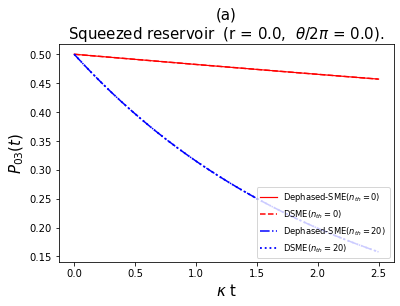

In [43]:
tlist = np.linspace(0, 50, 600)

taulist = tlist * kappa

delta = 0.0

t = 0.25 * 2 * pi
phi = 0.0 * pi

# Initial fock state
#-------------------
#psi0=tensor(fock(4,0), cos(t/2)*fock(5,0)+(np.exp(1j*phi))*sin(t/2)*fock(5,3) )
psi0=tensor(cos(t/2)*fock(2,0)+(np.exp(1j*phi))*sin(t/2)*fock(2,1), fock(3,0))
#psi0=tensor(coherent(4,sqrt(0))+coherent(4,sqrt(1)), coherent(5,sqrt(3)))/np.sqrt(2)
rho0=psi0*psi0.dag()
#rho0_fock11 = ptrace(rho0,0)
#rho0_fock12 = ptrace(rho0,1)

# Standard master equation solver
#--------------------------------
#L = sum([spre(c)*spost(c.dag()) - 0.5 * spre(c.dag()*c) - 0.5 * spost(c.dag()*c) for c in c_ops])
#H_nonlin = -delta * (num_d) + num_c - g0 * (c + c.dag()) * num_d - 1j*E*(c.dag()-c)

H_nonlin1 = 10**3 * (num_d) + num_c - (0.01 * num_d)**2
H_nonlin2 = 10**3 * (num_d) + num_c - (0.01 * num_d)**2
H_nonlin3 = 10**3 * (num_d) + num_c - (0.01 * num_d)**2
H_nonlin4 = 10**3 * (num_d) + num_c - (0.01* num_d)**2

#alpha = sol(gamma, kappa, delta, g0, E)[0]
#alpha_s = sol(gamma, kappa, delta, g0, E)[1]
#b = sol(gamma, kappa, delta, g0, E)[2]

#deltaP = delta - g0 * b

#H_nonlinear = -deltaP*num_d+num_c+g0*(complex(alpha_s)*d+complex(alpha)*d.dag())*(c+c.dag())+g0*num_d*(c+c.dag())

thet = 0.0
r = 0.0
theta = thet*2*pi

result0 = mesolve(H_nonlin1, psi0, taulist, collapse(0,r,theta,2,0.8), [])
result1 = mesolve(H_nonlin2, psi0, taulist, collapse(0,r,theta,2,0.8), [])


result2 = mesolve(H_nonlin3, psi0, taulist, collapse(20,r,theta,2,0.8), [])
result3 = mesolve(H_nonlin4, psi0, taulist, collapse(20,r,theta,2,0.8), [])

#result = mesolve(H_non_linear, rho0, taulist, c_ops, [])
#expt = mesolve(H_non_linear, psi0, taulist, c_ops, [d.dag()*d , c.dag()*c])

rho_evol0, rho_evol1, rho_evol2, rho_evol3 = [], [], [], []
for i in range(len(result0.times)):
    mat_ele0 = np.array(ptrace(result0.states[i],0))[0][1]
    rho_evol0.append(LA.norm(mat_ele0))
for i in range(len(result1.times)):
    mat_ele1 = np.array(ptrace(result1.states[i],0))[0][1]
    rho_evol1.append(LA.norm(mat_ele1))
for i in range(len(result2.times)):
    mat_ele2 = np.array(ptrace(result2.states[i],0))[0][1]
    rho_evol2.append(LA.norm(mat_ele2))
for i in range(len(result3.times)):
    mat_ele3 = np.array(ptrace(result3.states[i],0))[0][1]
    rho_evol3.append(LA.norm(mat_ele3))
#for i in range (len(result.times)):
   # mat_ele = np.array(ptrace(result.states[i],0))[0][1]
   # rho_evol.append(LA.norm(mat_ele))


#rho_ss0 = steadystate(H_nonlin, sc_ops0)
#rho_ss1 = steadystate(H_nonlin, sc_ops1)

plt.plot(result0.times, rho_evol0,'r',lw=1.2)
plt.plot(result1.times, rho_evol1,'r--',lw=1.5)
plt.plot(result2.times, rho_evol2,'b-.',lw=1.5)
plt.plot(result3.times, rho_evol3,'b:',lw=1.8)
#plt.plot(result.times, rho_evol);
#plt.plot(result.times, expt1.expect[0]);

plt.xlabel('$\kappa$ t', fontsize=15);

plt.ylabel(r'$ P_{03} (t) $', fontsize=15);

plt.title('(a)\n'+'Squeezed reservoir' + '  (r = %2.1f,  '%r + r'$ \theta / 2\pi $ = %2.1f).' %thet, fontsize=15)

l = plt.legend(["Dephased-SME($n_{th}=0$)", "DSME($n_{th}=0$)", "Dephased-SME($n_{th}=20$)", "DSME($n_{th}=20$)"]
               , fontsize="small", loc=4)
#l = plt.legend(['$g_0=0.01 \omega_m$', '$g_0 = 0.1 \omega_m$', '$g_0 = 0.5 \omega_m$', '$g_0 = 1 \omega_m$']
#               , fontsize="large", loc=1)
for text in l.get_texts():
    text.set_color("black")
    
plt.savefig('prev.eps', format='eps')

plt.show()

#tensor(qeye(Nc), destroy(Nm))*tensor(fock(Nc,0),fock(Nm,1))
#A = Qobj(np.exp(num_d*g0*(c.dag()-c)))

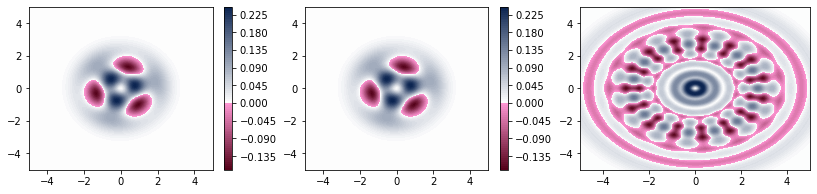

In [34]:
xvec = np.linspace(-10, 10, 600)
W = wigner((result1.states[0]), xvec, xvec)
W00 = wigner(ptrace(result0.states[15],0), xvec, xvec)
W01 = wigner(ptrace(result1.states[15],0), xvec, xvec)
wmap = wigner_cmap(W00, shift=-1e-5)
wmap1 = wigner_cmap(W01, shift=-1e-5)
wmap2 = wigner_cmap(W, shift=-1e-5)
fig, ax = plt.subplots(1,3, figsize=(14,3))
q = ax[0].contourf(xvec, xvec, W00, 100, cmap = wmap)
p = ax[1].contourf(xvec, xvec, W01, 100, cmap = wmap1)
s = ax[2].contourf(xvec, xvec, W, 100, cmap = wmap2)
ax[0].set_xlim([-5, 5])
ax[0].set_ylim([-5, 5])
ax[1].set_xlim([-5, 5])
ax[1].set_ylim([-5, 5])
ax[2].set_xlim([-5, 5])
ax[2].set_ylim([-5, 5])
plt.colorbar(q, ax=ax[0]);
plt.colorbar(p, ax=ax[1]);
#plt.colorbar(s, ax=ax[2]);
plt.show()

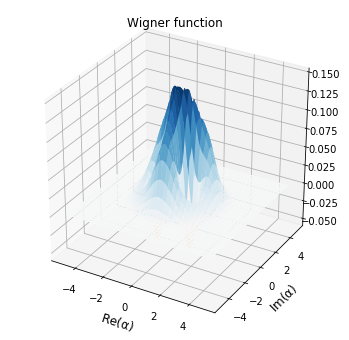

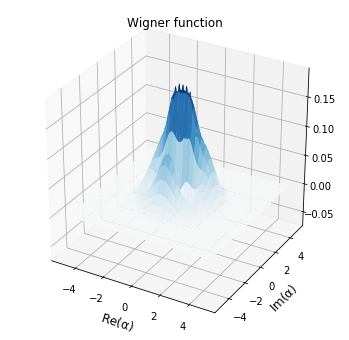

In [209]:
plot_wigner(ptrace(result0.states[50],0), alpha_max = 5, projection='3d');
plot_wigner(ptrace(result1.states[50],0), alpha_max = 5, projection='3d');
plt.show()

In [5]:
def sol(gamma, kappa, delta, g0, E):
    x, y = sy.symbols("x, y")
    
    C = 1j*g0**2/((gamma/2)**2 + 1)*1/(1j*delta-(kappa/2))
    D = np.conj(C)
    A = 1j*E*1/(1j*delta-(kappa/2))
    B = np.conj(A)
    values = sy.nsolve((x + C*y*x**2 - A, y + D*x*y**2 - B), (x, y), (0, 0))
    alpha = values[0]
    alpha_s = values[1] 

    X = round(LA.norm(complex(alpha)), 8)
    b = round(g0*X**2/((gamma/2)**2 + 1), 8)
    
    return [alpha, alpha_s, b]

In [ ]:
#System Parameters (in units of wm and hbar)
#-----------------------------------
Nc = 2                     # Number of cavity states
Nm = 3                     # Number of mech states
kappa = 0.05                # Cavity damping rate
E = 0.005                  # Driving Amplitude         
g0 = 0.8                   # Coupling strength
Qm = 1e4                   # Mech quality factor
gamma = kappa/3            # Mech damping rate
n_th = 20.0                # Mech bath temperature

tlist = np.linspace(0, 200, 1000)

taulist = tlist * kappa

delta = 0.0


# Initialize
#-------------------
print('\n 0-->optical\n 1-->mechanical')
c1 = int(input())
if c1==0:
    print(u'Input intial state: (|n1> + |n2>) \u2297 |m>')
    n1 = int(input())
    n2 = int(input())
    m = int(input())
    print('|n1>=|%i>,'%n1, '|n2>=|%i>,'%n2, '|m>=|%i>'%m)
    rho0 = initst(Nc, Nm, n1, n2, m, c1)
if c1==1:
    print(u'Input intial state: |n> \u2297 (|m1> + |m2>)')
    m1 = int(input())
    m2 = int(input())
    n = int(input())
    print('|n>=|%i>,'%n, '|m1>=|%i>,'%m1, '|m2>=|%i>'%m2)
    rho0 = initst(Nc, Nm, m1, m2, n, c1)
    

d = tensor(destroy(Nc), qeye(Nm))
c = tensor(qeye(Nc), destroy(Nm))
num_d = d.dag()*d
num_c = c.dag()*c

#H_nonlin = -delta * (num_d) + num_c - g0 * (c + c.dag()) * num_d - 1j*E*(d.dag()-d)
H_nonlin = 10**3 * (num_d) + num_c - (g0 * num_d)**2

alpha = sol(gamma, kappa, delta, g0, E)[0]
alpha_s = sol(gamma, kappa, delta, g0, E)[1]
b = sol(gamma, kappa, delta, g0, E)[2]

deltaP = delta - g0 * b


H_nonlinear = -deltaP*num_d+num_c+g0*(complex(alpha_s)*d+complex(alpha)*d.dag())*(c+c.dag())+g0*num_d*(c+c.dag())


t, t1, th = [], [], []
thetalist = np.linspace(0, 1, 100)

print('Input r value between 0 and 1')
rs = float(input())

print('\n 1 --> SME\n 11 --> squeezed SME\n 2 --> thermal dephased-SME\n 21 --> squeezed dephased-SME\n 3 --> thermal DSME\n 31 --> squeezed DSME')
x = int(input())
y = int(input())
strx = legstr(x)
stry = legstr(y)

print(u'Input q1, q2 for matrix element norm |<q1| \u03f1 (t) |q2>|')
q1 = int(input())
q2 = int(input())

#Calculate
#---------
for i in range(len(thetalist)):
    theta = i * 0.01 * 2*pi  
    
    result0 = mesolve(H_nonlin, rho0, taulist, collapse(n_th, rs, theta, x,g0), [])
    for k in range(len(result0.times)):
        mat_ele0 = np.array(ptrace(result0.states[k],c1))[q1][q2]
        rho_evol0 = LA.norm(mat_ele0)
        if rho_evol0 < 0.1:
            t.append(result0.times[k])
            break
    
    
    result1 = mesolve(H_nonlin, rho0, taulist, collapse(n_th, rs, theta, y,g0), [])
    for k in range(len(result1.times)):
        mat_ele1 = np.array(ptrace(result1.states[k],c1))[q1][q2]
        rho_evol1 = LA.norm(mat_ele1)
        if rho_evol1 < 0.1:
            t1.append(result1.times[k])
            break
    th.append(theta/(2*pi))
    
#Second initialize
#-----------------
print(u'Input \u0398/2\u03c0 value between 0 and 1')
thet = float(input())
theta = thet * (2*pi)

r1, r2 = [], []

rlist = np.linspace(0, 3, 100)

#Second calculate
#----------------
for i in range(len(rlist)):
    r = i * 0.03  
    
    result0 = mesolve(H_nonlin, rho0, taulist, collapse(n_th, r, theta, x, g0), [])
    for k in range(len(result0.times)):
        mat_ele0 = np.array(ptrace(result0.states[k],c1))[q1][q2]
        rho_evol0 = LA.norm(mat_ele0)
        if rho_evol0 < 0.1:
            r1.append(result0.times[k])
            break
    
    
    result1 = mesolve(H_nonlin, rho0, taulist, collapse(n_th, r, theta, y,g0), [])
    for k in range(len(result1.times)):
        mat_ele1 = np.array(ptrace(result1.states[k],c1))[q1][q2]
        rho_evol1 = LA.norm(mat_ele1)
        if rho_evol1 < 0.1:
            r2.append(result1.times[k])
            break
            
#Plotting
#--------
plt.plot(th, t, 'b');
plt.plot(th, t1, 'b--');

if q1 == 0:
    num = str(q2)
    res = num.zfill(2)
else:
    N = [q1, q2]
    res = (''.join(str(l) for l in N))
    
if c1 == 0:
    plt.title('(a)\n'+'Optical decoherence times for $P_{%s}(t)$ ' %res + ' (r = %2.1f)' %rs, fontsize=15)
if c1 == 1:
    plt.title('Mechanical decoherence times for $P_{%s}(t)$ ' %res + ' (r = %2.1f)' %rs)
    
plt.ylabel('$\kappa$ t', fontsize=15);

plt.xlabel(r'$ \theta / 2\pi $', fontsize=15);

plt.legend((strx, stry),fontsize="large",loc=2);

plt.savefig('DSME_sqDSME1.eps', format = 'eps')

plt.show()

plt.plot(rlist, r1, 'b');
plt.plot(rlist, r2, 'b--');

if q1 == 0:
    num = str(q2)
    
    res = num.zfill(2)
else:
    N = [q1, q2]
    res = (''.join(str(l) for l in N))

if c1==0:
    plt.title('(b)\n'+'Optical decoherence times for $P_{%s}(t)$ ' %res + r' ($ \theta / 2\pi $ = %2.1f)' %thet, fontsize=15)
if c1==1:
    plt.title('Mechanical decoherence times for $P_{%s}(t)$ ' %res + r' ($ \theta / 2\pi $ = %2.1f)' %thet)

plt.ylabel('$\kappa$ t', fontsize=15);

plt.xlabel('r', fontsize=15);

plt.legend((strx, stry),fontsize="large",loc=4);

plt.savefig('DSME_sqDSME2.eps', format = 'eps')

plt.show()



 0-->optical
 1-->mechanical
0
Input intial state: (|n1> + |n2>) ⊗ |m>
0
1
0
|n1>=|0>, |n2>=|1>, |m>=|0>
Input r value between 0 and 1
0.5

 1 --> SME
 11 --> squeezed SME
 2 --> thermal dephased-SME
 21 --> squeezed dephased-SME
 3 --> thermal DSME
 31 --> squeezed DSME
3
31
Input q1, q2 for matrix element norm |<q1| ϱ (t) |q2>|
0
1
Input Θ/2π value between 0 and 1


In [7]:
def initst(Nc, Nm, p1, p2, p3, c1):

    T = 0.25 * 2 * pi
    phi = 0.0 * 2 * pi
    if c1==0:
        psi0=tensor(cos(T/2)*fock(Nc,p1)+(np.exp(1j*phi))*sin(T/2)*fock(Nc,p2), fock(Nm, p3))
        rho0=psi0*psi0.dag()
        return rho0
    if c1==1:
        psi0=tensor(fock(Nc, p3), cos(T/2)*fock(Nm,p1)+(np.exp(1j*phi))*sin(T/2)*fock(Nm,p2))
        rho0=psi0*psi0.dag()
        return rho0
    else:
        print('error')

In [8]:
def collapse(n_th, r, theta, z, g0):
#    theta = thet * 2*pi
    N = sinh(r)**2
    Neff = n_th*(cosh(r)**2 + sinh(r)**2) + sinh(r)**2
    Meff = cosh(r)*sinh(r)*(2*n_th + 1)*np.exp(1j*theta)
    M = cosh(r)*sinh(r)*np.exp(1j*theta)
    
    if z == 1:
        # Collapse operators SME
        cc0 = np.sqrt(kappa)*d
        cm0 = np.sqrt(gamma*(1.0 + n_th))*c
        cp0 = np.sqrt(gamma*(n_th))*c.dag()
        c_ops0 = [cc0,cm0,cp0]
        return c_ops0
    
    if z == 11:
        #Squeezed collapse op SME
        o0 = np.sqrt(kappa*(N + 1))*d
        o1 = np.sqrt(kappa*N)*d.dag()
        o2 = np.sqrt(kappa*M)*d
        o3 = np.sqrt(kappa*np.conj(M))*d.dag()
        op = [o0, o1]
        op1 = [o2, o3]
        SLo0 = sum([spre(a)*spost(a.dag()) - 0.5 * spre(a.dag()*a) - 0.5 * spost(a.dag()*a) for a in op])
        SLo1 = sum([spre(a)*spost(a) - 0.5 * spre(a*a) - 0.5 * spost(a*a) for a in op1])
        SLo = SLo0 + SLo1
        m0 = np.sqrt(gamma*(Neff + 1))*c
        m1 = np.sqrt(gamma*Neff)*c.dag()
        m2 = np.sqrt(gamma*Meff)*c
        m3 = np.sqrt(gamma*np.conj(Meff))*c.dag()
        mp = [m0, m1]
        mp1 = [m2, m3]
        SLm0 = sum([spre(a)*spost(a.dag()) - 0.5 * spre(a.dag()*a) - 0.5 * spost(a.dag()*a) for a in mp])
        SLm1 = sum([spre(a)*spost(a) - 0.5 * spre(a*a) - 0.5 * spost(a*a) for a in mp1])
        SLm = SLm0 + SLm1
        return [SLo, SLm]
    
    if z == 2:
        # dephsed Collapse operators_dphasd-SME
        #-------------------
        cc = np.sqrt(kappa)*d
        cm = np.sqrt(gamma*(1.0 + n_th))*(c - g0*(d.dag()*d))
        cp = np.sqrt(gamma*n_th)*(c.dag() - g0*(d.dag()*d))
        cncm = np.sqrt(gamma*((2*n_th) + 1.0))*(g0*d.dag()*d)
        c_ops = [cc,cm,cp,cncm]
        return c_ops
    
    if z == 21:
        # dephased squeezed Collapse operators dphasd-SSME
        #-------------------
        o0 = np.sqrt(kappa*(N + 1))*d
        o1 = np.sqrt(kappa*N)*d.dag()
        o2 = np.sqrt(kappa*M)*d
        o3 = np.sqrt(kappa*np.conj(M))*d.dag()
        op = [o0, o1]
        op1 = [o2, o3]
        SLo0 = sum([spre(a)*spost(a.dag()) - 0.5 * spre(a.dag()*a) - 0.5 * spost(a.dag()*a) for a in op])
        SLo1 = sum([spre(a)*spost(a) - 0.5 * spre(a*a) - 0.5 * spost(a*a) for a in op1])
        SLo = SLo0 + SLo1
        Dm0 = np.sqrt(gamma*(Neff + 1))*(c - g0*(num_d))
        Dm1 = np.sqrt(gamma*Neff)*(c.dag() - g0*(num_d))
        Dm2 = np.sqrt(gamma*Meff)*(c - g0*(num_d))
        Dm3 = np.sqrt(gamma*np.conj(Meff))*(c.dag() - g0*(num_d))
        Dm4 = np.sqrt(4*gamma*n_th*(cosh(r)**2 + sinh(r)**2 + 2*cosh(r)*sinh(r)*cos(theta)))*(g0*d.dag()*d)
        Dmp = [Dm0, Dm1]
        Dmp1 = [Dm2, Dm3]
        Dmp2 = [Dm4]
        DSLm0 = sum([spre(a)*spost(a.dag()) - 0.5 * spre(a.dag()*a) - 0.5 * spost(a.dag()*a) for a in Dmp])
        DSLm1 = sum([spre(a)*spost(a) - 0.5 * spre(a*a) - 0.5 * spost(a*a) for a in Dmp1])
        DSLm2 = sum([spre(a)*spost(a) - 0.5 * spre(a*a) - 0.5 * spost(a*a) for a in Dmp2])
        DSLm = DSLm0 + DSLm1
        dDm0 = np.sqrt(gamma*(2*Neff + 1))*(g0*d.dag()*d)
        dDm1 = (g0*d.dag()*d)
        D = 2*gamma*cosh(r)*sinh(r)*cos(theta)*(2*n_th + 1)
        dDmp = [dDm0]
        dDmp1 = [dDm1]
        dDSLm0 = sum([spre(a)*spost(a.dag()) - 0.5 * spre(a.dag()*a) - 0.5 * spost(a.dag()*a) for a in dDmp])
        dDSLm1 = sum([D*spre(a)*spost(a) - 0.5 * D*spre(a*a) - 0.5 * D*spost(a*a) for a in dDmp1])
        dDSLm = DSLm + (dDSLm0 + dDSLm1)
        return [SLo, dDSLm]
        
    
    if z == 3:
        # dressed state Collapse operators_DSME
        #-------------------
        cc1 = np.sqrt(kappa)*d
        cm1 = np.sqrt(gamma*(1.0 + n_th))*(c - g0*(d.dag()*d))
        cp1 = np.sqrt(gamma*n_th)*(c.dag() - g0*(d.dag()*d))
        cp11 = 2*np.sqrt(gamma*n_th)*(g0*d.dag()*d)
        c_ops1 = [cc1,cm1,cp1,cp11]
        return c_ops1
    
    if z == 31:
        # dressed state squeezed Collapse operators_SDSME
        #-------------------
        o0 = np.sqrt(kappa*(N + 1))*d
        o1 = np.sqrt(kappa*N)*d.dag()
        o2 = np.sqrt(kappa*M)*d
        o3 = np.sqrt(kappa*np.conj(M))*d.dag()
        op = [o0, o1]
        op1 = [o2, o3]
        SLo0 = sum([spre(a)*spost(a.dag()) - 0.5 * spre(a.dag()*a) - 0.5 * spost(a.dag()*a) for a in op])
        SLo1 = sum([spre(a)*spost(a) - 0.5 * spre(a*a) - 0.5 * spost(a*a) for a in op1])
        SLo = SLo0 + SLo1
        Dm0 = np.sqrt(gamma*(Neff + 1))*(c - g0*(num_d))
        Dm1 = np.sqrt(gamma*Neff)*(c.dag() - g0*(num_d))
        Dm2 = np.sqrt(gamma*np.conj(Meff))*(c - g0*(num_d))
        Dm3 = np.sqrt(gamma*Meff)*(c.dag() - g0*(num_d))
        Dm4 = np.sqrt(4*gamma*n_th*(cosh(r)**2 + sinh(r)**2 + 2*cosh(r)*sinh(r)*cos(theta)))*(g0*d.dag()*d)
        Dmp = [Dm0, Dm1]
        Dmp1 = [Dm2, Dm3]
        Dmp2 = [Dm4]
        DSLm0 = sum([spre(a)*spost(a.dag()) - 0.5 * spre(a.dag()*a) - 0.5 * spost(a.dag()*a) for a in Dmp])
        DSLm1 = sum([spre(a)*spost(a) - 0.5 * spre(a*a) - 0.5 * spost(a*a) for a in Dmp1])
        DSLm2 = sum([spre(a)*spost(a) - 0.5 * spre(a*a) - 0.5 * spost(a*a) for a in Dmp2])
        DSLm = DSLm0 + DSLm1 + DSLm2
        return [SLo, DSLm]
    
    else:
        print('Input/s not in list')    
        return 0

In [9]:
def legstr(x):
    if x == 1:
        str1 = 'SME'
        return str1
    elif x == 2:
        str1 = 'dephased-SME'
        return str1
    elif x == 3:
        str1 = 'thermal DSME'
        return str1
    elif x == 11:
        str1 = 'squeezed SME'
        return str1
    elif x == 21:
        str1 = 'squeezed dephased-SME'
        return str1
    elif x == 31:
        str1 = 'squeezed thermal DSME'
        return str1
    else:
        print('Input/s not in list')
        return 0

In [132]:
np.exp(1j*0.01)

(0.9999500004166653+0.009999833334166664j)

In [10]:
theta = 0.1

In [20]:
ptrace(result0.states[499],0)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 9.86586164e-01+0.00000000e+00j -1.59991581e-02-4.25514505e-02j
  -9.16270381e-04+2.51539360e-04j  3.46762913e-06+1.33509633e-05j]
 [-1.59991581e-02+4.25514505e-02j  1.34052300e-02+0.00000000e+00j
   2.66447279e-05-2.84940802e-04j -3.82625109e-06-4.21090263e-07j]
 [-9.16270381e-04-2.51539360e-04j  2.66447279e-05+2.84940802e-04j
   8.60286968e-06+0.00000000e+00j  9.89885032e-09-1.47039315e-07j]
 [ 3.46762913e-06-1.33509633e-05j -3.82625109e-06+4.21090263e-07j
   9.89885032e-09+1.47039315e-07j  3.21084668e-09+0.00000000e+00j]]

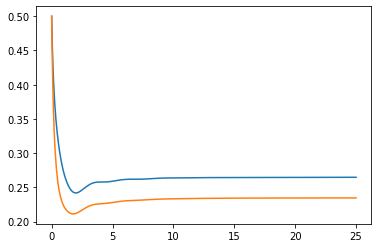

In [15]:
r1, r2 = [], []
n_th =0
    
result0 = mesolve(H_nonlin, rho0, taulist, collapse(n_th, 1, theta, 11), [])
result1 = mesolve(H_nonlin, rho0, taulist, collapse(n_th, 1, theta, 31), [])

rho_evol0, rho_evol1, rho_evol = [], [], []
for i in range(len(result0.times)):
    mat_ele0 = np.array(ptrace(result0.states[i],0))[1][1]
    rho_evol0.append(LA.norm(mat_ele0))
for i in range(len(result1.times)):
    mat_ele1 = np.array(ptrace(result1.states[i],0))[1][1]
    rho_evol1.append(LA.norm(mat_ele1))
    
        
plt.plot(result0.times, rho_evol0);
plt.plot(result1.times, rho_evol1);
plt.show()

In [41]:
z = 100*1
N = 1/(2*(1+np.exp(-2*(z*np.conj(z)))))
N

0.5

In [42]:
(coherent(10,-sqrt(z))+coherent(10,sqrt(z)))*np.sqrt(N)

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[-0.0070626 ]
 [ 0.        ]
 [ 0.04346645]
 [ 0.        ]
 [ 0.28144684]
 [ 0.        ]
 [ 0.33261935]
 [ 0.        ]
 [ 0.1987127 ]
 [ 0.        ]]

In [39]:
t = 0.25 * 2* pi
phi = pi/2
cos(t/2)*fock(4,0)+complex(np.exp(1j*phi))*sin(t/2)*fock(4,1)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        -0.70710678j]
 [0.        +0.j        ]
 [0.        +0.j        ]]

In [477]:
psi0=tensor(cos(t/2)*fock(2,0)+(np.exp(1j*phi))*sin(t/2)*fock(2,1),fock(2,0))
rho0 = psi0*psi0.dag()
c*c.dag()

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

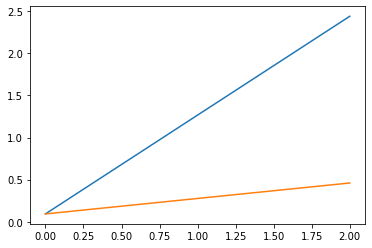

100

In [16]:
n_th = 0
ra = []
M = []
r = 0.3
nlist = np.linspace(0,2,100)

for k in range(len(nlist)):
    n_th = k * 0.02
    Meff2 = ((cosh(r)*sinh(r))*(2*n_th + 1))**2
    rat = ((sinh(r)*np.sqrt(2*n_th+1))**2 + n_th)
    ra.append(rat)
    M.append((sinh(r)*np.sqrt(2*n_th+1))**2)

plt.plot(nlist, ra)
plt.plot(nlist, M)
plt.show()
len(nlist)

In [13]:
n_th = 200
k = 1.38*10**(-23)
hbar = 1.06*10**(-34)
wm = 10**6
T = n_th*(hbar*wm)/k
print(T)

0.0015362318840579712
